In [62]:
import os
import numpy as np
from collections import defaultdict
from pyannote.core import Annotation, Segment
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate, JaccardErrorRate

# load rttm files for metrics calculating
base_dir = '/home/jovyan/work'
reference_path = '{}/datasets/voxconverse/test/rttm'.format(base_dir)
hypothesis_path = '{}/voxcon-test-uisrnn-rttm/rttm'.format(base_dir)

sample_ids = ["aepyx", "aiqwk", "bjruf", "bmsyn", "bxcfq", "byapz", "clfcg", "cqfmj", "crylr", "cvofp", "dgvwu", "dohag", "dxbbt", "dzsef", "eauve", "eazeq", "eguui", "epygx", "eqsta", "euqef", "fijfi", "fpfvy", "fqrnu", "fxnwf", "fyqoe", "gcfwp", "gtjow", "gtnjb", "gukoa", "guvqf", "gylzn", "gyomp", "hcyak", "heolf", "hhepf", "ibrnm", "ifwki", "iiprr", "ikhje", "jdrwl", "jjkrt", "jjvkx", "jrfaz", "jsbdo", "jttar", "jxpom", "jzkzt", "kajfh", "kmunk", "kpjud", "ktvto", "kvkje", "lbfnx", "ledhe", "lilfy", "ljpes", "lkikz", "lpola", "lscfc", "ltgmz", "lubpm", "luobn", "mjmgr", "msbyq", "mupzb", "myjoe", "nlvdr", "nprxc", "ocfop", "ofbxh", "olzkb", "ooxlj", "oqwpd", "otmpf", "ouvtt", "poucc", "ppexo", "pwnsw", "qadia", "qeejz", "qlrry", "qwepo", "rarij", "rmvsh", "rxulz", "sebyw", "sexgc", "sfdvy", "svxzm", "tkybe", "tpslg", "uedkc", "uqxlg", "usqam", "vncid", "vylyk", "vzuru", "wdvva", "wemos", "wprog", "wwzsk", "xggbk", "xkgos", "xlyov", "xmyyy", "xqxkt", "xtdcl", "xtzoq", "xvxwv", "ybhwz", "ylzez", "ytmef", "yukhy", "yzvon", "zedtj", "zfzlc", "zowse", "zqidv", "zztbo", "ralnu", "uicid", "laoyl", "jxydp", "pzxit", "upshw", "gfneh", "kzmyi", "nkqzr", "kgjaa", "dkabn", "eucfa", "erslt", "mclsr", "fzwtp", "dzxut", "pkwrt", "gmmwm", "leneg", "sxqvt", "pgtkk", "fuzfh", "vtzqw", "rsypp", "qxana", "optsn", "dxokr", "ptses", "isxwc", "gzhwb", "mhwyr", "duvox", "ezxso", "jgiyq", "rpkso", "kmjvh", "wcxfk", "gcvrb", "eddje", "pccww", "vuewy", "tvtoe", "oubab", "jwggf", "aggyz", "bidnq", "neiye", "mkhie", "iowob", "jbowg", "gwloo", "uevxo", "nitgx", "eoyaz", "qoarn", "mxdpo", "auzru", "diysk", "cwbvu", "jeymh", "iacod", "cawnd", "vgaez", "bgvvt", "tiido", "aorju", "qajyo", "ryken", "iabca", "tkhgs", "tbjqx", "mqtep", "fowhl", "fvhrk", "nqcpi", "mbzht", "uhfrw", "utial", "cpebh", "tnjoh", "jsymf", "vgevv", "mxduo", "gkiki", "bvyvm", "hqhrb", "isrps", "nqyqm", "dlast", "pxqme", "bpzsc", "vdlvr", "lhuly", "crorm", "bvqnu", "tpnyf", "thnuq", "swbnm", "cadba", "sbrmv", "wibky", "wlfsf", "wwvcs", "xffsa", "xkmqx", "xlsme", "ygrip", "ylgug", "ytula", "zehzu", "zsgto", "zzsba", "zzyyo"]

In [12]:
der_metric = DiarizationErrorRate(collar=0.25)
jer_metric = JaccardErrorRate(collar=0.25)

der_metric_so = DiarizationErrorRate(collar=0.25, skip_overlap=True)
jer_metric_so = JaccardErrorRate(collar=0.25, skip_overlap=True)

for idx, sample_id in enumerate(sample_ids):
    reference_file = os.path.join(reference_path, sample_id + '.rttm')
    hypotesis_file = os.path.join(hypothesis_path, sample_id + '.rttm')

    reference = load_rttm(reference_file)[sample_id]
    hypothesis = load_rttm(hypotesis_file)['<NA>']
    
    der = der_metric(reference, hypothesis, detailed = True)
    jer = jer_metric(reference, hypothesis)
    
    der_so = der_metric_so(reference, hypothesis, detailed = True)
    jer_so = jer_metric_so(reference, hypothesis)
    
    print(idx+1,'/',len(sample_ids))
    
total_der = abs(der_metric)
total_jer = abs(jer_metric)
total_conf = der_metric.accumulated_['confusion']/der_metric.accumulated_['total']
total_fa = der_metric.accumulated_['false alarm']/der_metric.accumulated_['total']
total_md = der_metric.accumulated_['missed detection']/der_metric.accumulated_['total']

total_der_so = abs(der_metric_so)
total_jer_so = abs(jer_metric_so)
total_conf_so = der_metric_so.accumulated_['confusion']/der_metric_so.accumulated_['total']
total_fa_so = der_metric_so.accumulated_['false alarm']/der_metric_so.accumulated_['total']
total_md_so = der_metric_so.accumulated_['missed detection']/der_metric_so.accumulated_['total']
    
print('--------------- rttm-collar ----------------')
print(f'DER = {100 * total_der:.1f}% JER = {100 * total_jer:.1f}%')
print(f'DER_conf = {100 * total_conf:.1f}% DER_fa = {100 * total_fa:.1f}% DER_md = {100 * total_md:.1f}%')
print('\nSkip Overlap')
print(f'DER = {100 * total_der_so:.1f}% JER = {100 * total_jer_so:.1f}%')
print(f'DER_conf = {100 * total_conf_so:.1f}% DER_fa = {100 * total_fa_so:.1f}% DER_md = {100 * total_md_so:.1f}%')

1 / 232
2 / 232
3 / 232
4 / 232
5 / 232
6 / 232
7 / 232
8 / 232
9 / 232
10 / 232
11 / 232
12 / 232
13 / 232
14 / 232
15 / 232
16 / 232
17 / 232
18 / 232
19 / 232
20 / 232
21 / 232
22 / 232
23 / 232
24 / 232
25 / 232
26 / 232
27 / 232
28 / 232
29 / 232
30 / 232
31 / 232
32 / 232
33 / 232
34 / 232
35 / 232
36 / 232
37 / 232
38 / 232
39 / 232
40 / 232
41 / 232
42 / 232
43 / 232
44 / 232
45 / 232
46 / 232
47 / 232
48 / 232
49 / 232
50 / 232
51 / 232
52 / 232
53 / 232
54 / 232
55 / 232
56 / 232
57 / 232
58 / 232
59 / 232
60 / 232
61 / 232
62 / 232
63 / 232
64 / 232
65 / 232
66 / 232
67 / 232
68 / 232
69 / 232
70 / 232
71 / 232
72 / 232
73 / 232
74 / 232
75 / 232
76 / 232
77 / 232
78 / 232
79 / 232
80 / 232
81 / 232
82 / 232
83 / 232
84 / 232
85 / 232
86 / 232
87 / 232
88 / 232
89 / 232
90 / 232
91 / 232
92 / 232
93 / 232
94 / 232
95 / 232
96 / 232
97 / 232
98 / 232
99 / 232
100 / 232
101 / 232
102 / 232
103 / 232
104 / 232
105 / 232
106 / 232
107 / 232
108 / 232
109 / 232
110 / 232
111 / 23

In [76]:
hypothesis_path_uisrnn = '{}/voxcon-test-uisrnn-rttm/rttm'.format(base_dir)
hypothesis_path_spectral = '{}/voxcon-test-rttm/rttm'.format(base_dir)
sample_id = sample_ids[-1]
reference_file = os.path.join(reference_path, sample_id + '.rttm')
hypotesis_file_uisrnn = os.path.join(hypothesis_path_uisrnn, sample_id + '.rttm')
hypotesis_file_spectral = os.path.join(hypothesis_path_spectral, sample_id + '.rttm')
reference = load_rttm(reference_file)[sample_id]
hypothesis_uisrnn = load_rttm(hypotesis_file_uisrnn)['<NA>']
hypothesis_spectral = load_rttm(hypotesis_file_spectral)[sample_id]

In [77]:
from pyannote.core import Segment, notebook
# make notebook visualization zoom on 600s < t < 660s time range
EXCERPT = Segment(0, 800)
notebook.crop = EXCERPT

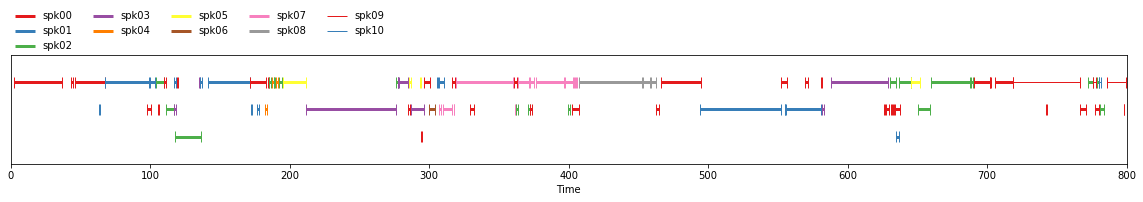

In [78]:
reference

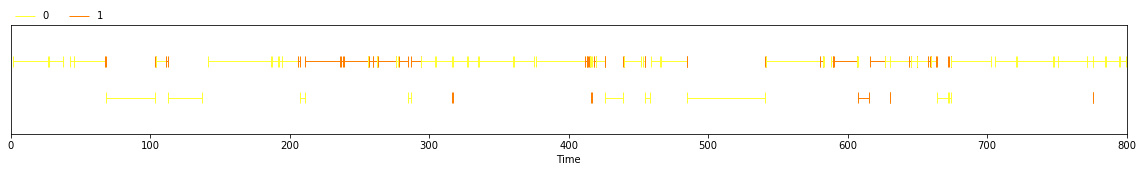

In [79]:
hypothesis_spectral

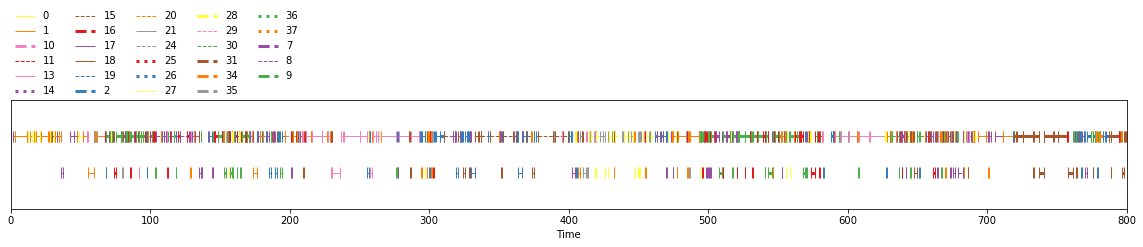

In [80]:
hypothesis_uisrnn

VoxConverse Test Set (UISRNN ICASSP2019)

--------------- rttm ----------------

DER = 56.1% JER = 65.1%
DER_conf = 49.6% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 54.9% JER = 63.6%
DER_conf = 50.5% DER_fa = 2.0% DER_md = 2.4%

--------------- rttm-collar ----------------

DER = 57.7% JER = 63.8%
DER_conf = 47.9% DER_fa = 5.9% DER_md = 3.9%

Skip Overlap
DER = 56.7% JER = 62.3%
DER_conf = 48.7% DER_fa = 6.2% DER_md = 1.9%

VoxConverse Test Set (Spectral Clustering ICASSP2018)

------------------- rttm ---------------------

DER = 41.5% JER = 82.1%
DER_conf = 35.0% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 40.5% JER = 81.5%
DER_conf = 36.0% DER_fa = 2.0% DER_md = 2.4%

--------------- rttm-collar ----------------

DER = 41.7% JER = 82.0%
DER_conf = 34.9% DER_fa = 3.0% DER_md = 3.7%

Skip Overlap
DER = 40.7% JER = 81.4%
DER_conf = 36.0% DER_fa = 3.2% DER_md = 1.6%

-------------- rttm-autotune ----------------

DER = 41.1% JER = 83.1%
DER_conf = 34.6% DER_fa = 1.9% DER_md = 4.6%

Skip Overlap
DER = 40.2% JER = 82.6%
DER_conf = 35.7% DER_fa = 2.0% DER_md = 2.4%

---------- rttm-collar-autotune -------------

DER = 41.2% JER = 83.0%
DER_conf = 34.6% DER_fa = 2.9% DER_md = 3.7%

Skip Overlap
DER = 40.3% JER = 82.6%
DER_conf = 35.7% DER_fa = 3.0% DER_md = 1.6%
